In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [345]:
explicativas = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
                '90-94', '95-99', '100+', 'POPULACAO', 'URBANIZACAO', 'GINI',
                'GASTOS_SAUDE', 'EXPECTATIVA_VIDA', 'DENSIDADE_MEDICOS',
                'DENSIDADE_LEITOS_POR_MIL']

dependente = ['CASOS_POR_MILHAO']

numericas = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
             '90-94', '95-99', '100+', 'POPULACAO', 'URBANIZACAO', 'GINI',
             'GASTOS_SAUDE', 'EXPECTATIVA_VIDA', 'DENSIDADE_MEDICOS',
             'DENSIDADE_LEITOS_POR_MIL', 'CASOS_POR_MILHAO']

numericas_letalidade = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
             '90-94', '95-99', '100+', 'POPULACAO', 'URBANIZACAO', 'GINI',
             'GASTOS_SAUDE', 'EXPECTATIVA_VIDA', 'DENSIDADE_MEDICOS',
             'DENSIDADE_LEITOS_POR_MIL', 'LETALIDADE']

retiradas = ['CASOS', 'MORTES', 'MORTES_POR_MILHAO']

grupos_etarios = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                  '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
                  '80-84', '85-89', '90-94', '95-99', '100+']

df = pd.read_csv('data/consolidadoWHO.csv', sep = ',')



df.drop(axis='columns', columns=retiradas, inplace=True)

    
print(df.CASOS_POR_MILHAO.mean())


36922.25794871795


In [346]:
def index_mean(data : pd.DataFrame, pais : str, indice : str):
    regiao = data.loc[data['PAIS'] == pais, 'SUB_REGIAO'].values[0]
    mean = data.query(f"SUB_REGIAO == '{regiao}'")[indice].mean()
    return mean


In [347]:
def full_na_with_mean(data : pd.DataFrame, indice : str): 
    dfNA = data[data[indice].isna()]
    dfNA.index = range(dfNA.shape[0])

    for i in range(dfNA.shape[0]) :
      pais = dfNA.PAIS.loc[i]
      indice_value = index_mean(data, pais, indice)
      data.loc[data['PAIS'] == pais, indice] = indice_value    

In [348]:
full_na_with_mean(df, 'GINI')
full_na_with_mean(df, 'GASTOS_SAUDE')
full_na_with_mean(df, 'EXPECTATIVA_VIDA')
full_na_with_mean(df, 'DENSIDADE_MEDICOS')
full_na_with_mean(df, 'DENSIDADE_LEITOS_POR_MIL')
full_na_with_mean(df, 'URBANIZACAO')


df.dropna(inplace=True)


In [349]:
df.isna().sum() 

AREA                        0
PAIS                        0
CONTINENTE                  0
SUB_REGIAO                  0
ISO                         0
0-4                         0
5-9                         0
10-14                       0
15-19                       0
20-24                       0
25-29                       0
30-34                       0
35-39                       0
40-44                       0
45-49                       0
50-54                       0
55-59                       0
60-64                       0
65-69                       0
70-74                       0
75-79                       0
80-84                       0
85-89                       0
90-94                       0
95-99                       0
100+                        0
POPULACAO                   0
URBANIZACAO                 0
GINI                        0
GASTOS_SAUDE                0
EXPECTATIVA_VIDA            0
DENSIDADE_MEDICOS           0
DENSIDADE_LEITOS_POR_MIL    0
CASOS_POR_

In [350]:
df.describe()

,AREA,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,CASOS_POR_MILHAO
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,194.000000,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,6.661995e+05,3.444873e+06,3.340523e+06,3.214672e+06,3.068355e+06,3.014063e+06,3.001501e+06,3.032181e+06,2.751037e+06,2.515105e+06,...,21691.118557,3482.237113,3.939759e+07,0.597776,38.385865,0.065812,73.536933,1.860527,2.941555,36946.917010
std,1.838358e+06,1.101348e+07,1.082511e+07,1.066149e+07,1.050662e+07,1.076206e+07,1.106652e+07,1.195679e+07,1.028240e+07,9.555439e+06,...,79160.035533,14185.134559,1.432352e+08,0.230551,7.168356,0.028609,7.037923,1.683566,2.384346,42218.594139
min,1.000000e+00,8.870000e+02,8.490000e+02,9.100000e+02,8.380000e+02,7.620000e+02,7.160000e+02,9.770000e+02,7.300000e+02,5.290000e+02,...,0.000000,0.000000,9.785000e+03,0.135000,24.200000,0.016000,53.250000,0.010000,0.100000,0.000000
25%,2.355250e+04,1.284750e+05,1.296988e+05,1.245998e+05,1.248310e+05,1.468092e+05,1.529948e+05,1.606285e+05,1.446870e+05,1.173065e+05,...,253.500000,17.500000,2.002670e+06,0.421500,33.350000,0.045000,69.022500,0.372500,1.300000,2343.100000
50%,1.165500e+05,6.381420e+05,6.528065e+05,6.161645e+05,5.846575e+05,5.642390e+05,6.117570e+05,6.045415e+05,5.864005e+05,5.171915e+05,...,1243.000000,96.500000,8.641960e+06,0.600000,37.445000,0.063000,75.045000,1.490000,2.350000,18802.350000
75%,5.237000e+05,2.732320e+06,2.775891e+06,2.679946e+06,2.476000e+06,2.386279e+06,2.256426e+06,2.017978e+06,1.774525e+06,1.560189e+06,...,8621.250000,1098.250000,2.916634e+07,0.782750,42.750000,0.081750,78.177500,2.912500,3.975000,65315.425000
max,1.637687e+07,1.163208e+08,1.161343e+08,1.164066e+08,1.168587e+08,1.153046e+08,1.092246e+08,1.261914e+08,9.947918e+07,9.248426e+07,...,673178.000000,140585.000000,1.394016e+09,1.000000,63.000000,0.191000,89.400000,8.420000,13.800000,186099.800000


In [351]:
data = df[numericas].values[:, :-1]
trans = StandardScaler()
data = trans.fit_transform(data)
dataset_explicativas = pd.DataFrame(data)
dataset_explicativas.columns = explicativas
dataset_explicativas

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,90-94,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL
0,7.226880,7.149135,7.005902,6.816679,7.684543,8.909822,10.327011,9.431499,9.439853,10.841103,...,7.973040,4.418106,1.534984,9.481769,0.118389,0.015963,-0.413938,0.395037,0.071148,0.571209
1,10.275406,10.446603,10.644365,10.858367,10.460919,9.623434,8.334478,9.138016,9.143086,7.752014,...,2.394865,1.052955,0.248348,9.006338,-1.060099,-0.375653,-1.079773,-0.499580,-0.595828,-1.026643
2,1.546981,1.561510,1.650869,1.714775,1.759353,1.858177,1.672593,1.869270,1.879666,1.712370,...,6.678897,7.939635,6.260847,2.052569,1.005517,0.379607,3.616117,0.981952,0.446322,-0.185668
3,1.550580,1.654191,1.772002,1.855472,1.790542,1.589866,1.386163,1.657143,1.797898,1.590121,...,0.769254,0.268465,0.144663,1.593307,-0.107742,-0.081941,-1.290036,-0.102131,-0.851899,-0.816399
4,2.397195,2.306594,2.147413,1.975785,1.703373,1.447579,1.140705,1.120799,1.004802,0.746910,...,-0.018687,-0.155836,-0.208095,1.358641,-0.973126,-0.683351,-1.184904,-0.593600,-0.524366,-0.984594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-0.313414,-0.309203,-0.302120,-0.292597,-0.280571,-0.271709,-0.254046,-0.267994,-0.263631,-0.237253,...,-0.294653,-0.273648,-0.245201,-0.275493,-1.968971,-1.039003,0.852025,1.256890,1.437108,1.580379
190,-0.313456,-0.309234,-0.302130,-0.292610,-0.280598,-0.271756,-0.254101,-0.268043,-0.263648,-0.237273,...,-0.294207,-0.272787,-0.243929,-0.275527,1.644771,-0.727641,0.181810,1.444931,2.530620,0.360965
191,-0.313488,-0.309272,-0.302152,-0.292625,-0.280634,-0.271749,-0.254103,-0.268094,-0.263744,-0.237364,...,-0.295227,-0.274573,-0.246049,-0.275615,0.944636,0.239744,1.513480,0.120099,-0.262340,0.781453
192,-0.313483,-0.309286,-0.302209,-0.292705,-0.280691,-0.271826,-0.254168,-0.268169,-0.263837,-0.237483,...,-0.295393,-0.274712,-0.246049,-0.275687,0.218408,0.099881,4.387083,-0.778792,-0.566052,-0.143620


In [352]:
dfCorr = df[numericas].corr()

In [353]:
dfCorr

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,95-99,100+,POPULACAO,URBANIZACAO,GINI,GASTOS_SAUDE,EXPECTATIVA_VIDA,DENSIDADE_MEDICOS,DENSIDADE_LEITOS_POR_MIL,CASOS_POR_MILHAO
0-4,1.000000,0.999331,0.997154,0.993599,0.989491,0.975667,0.942335,0.958630,0.954622,0.913630,...,0.323949,0.148354,0.964991,-0.105221,-0.009169,-0.128427,-0.102513,-0.123733,-0.124247,-0.126973
5-9,0.999331,1.000000,0.999146,0.996783,0.993098,0.979096,0.945017,0.963021,0.959518,0.917100,...,0.329679,0.154386,0.967896,-0.096537,-0.011491,-0.123463,-0.089531,-0.114384,-0.115763,-0.118878
10-14,0.997154,0.999146,1.000000,0.999137,0.995523,0.980618,0.944942,0.965108,0.962194,0.917827,...,0.335527,0.161001,0.968645,-0.089100,-0.011479,-0.116214,-0.077568,-0.106399,-0.110299,-0.109639
15-19,0.993599,0.996783,0.999137,1.000000,0.996499,0.980372,0.942512,0.964906,0.962559,0.915908,...,0.337774,0.164770,0.967131,-0.082213,-0.011379,-0.108657,-0.065136,-0.099071,-0.105678,-0.100613
20-24,0.989491,0.993098,0.995523,0.996499,1.000000,0.993024,0.965629,0.982373,0.980751,0.944787,...,0.360791,0.177292,0.983626,-0.068108,-0.013519,-0.096288,-0.044614,-0.084314,-0.087167,-0.093020
25-29,0.975667,0.979096,0.980618,0.980372,0.993024,1.000000,0.989205,0.996818,0.995615,0.975830,...,0.391261,0.192676,0.997198,-0.050211,-0.014508,-0.081025,-0.023445,-0.066190,-0.063555,-0.085340
30-34,0.942335,0.945017,0.944942,0.942512,0.965629,0.989205,1.000000,0.995405,0.994630,0.995992,...,0.411846,0.199186,0.995260,-0.032483,-0.013252,-0.069449,-0.006843,-0.047160,-0.036117,-0.079136
35-39,0.958630,0.963021,0.965108,0.964906,0.982373,0.996818,0.995405,1.000000,0.999631,0.987582,...,0.419142,0.214397,0.998526,-0.028147,-0.016433,-0.066650,-0.000803,-0.045361,-0.035156,-0.072051
40-44,0.954622,0.959518,0.962194,0.962559,0.980751,0.995615,0.994630,0.999631,1.000000,0.988590,...,0.429243,0.225276,0.997915,-0.021492,-0.020146,-0.061548,0.008982,-0.038199,-0.026288,-0.066368
45-49,0.913630,0.917100,0.917827,0.915908,0.944787,0.975830,0.995992,0.987582,0.988590,1.000000,...,0.447834,0.232516,0.986920,-0.009492,-0.021024,-0.049107,0.023425,-0.023683,-0.002510,-0.064417


<AxesSubplot:>

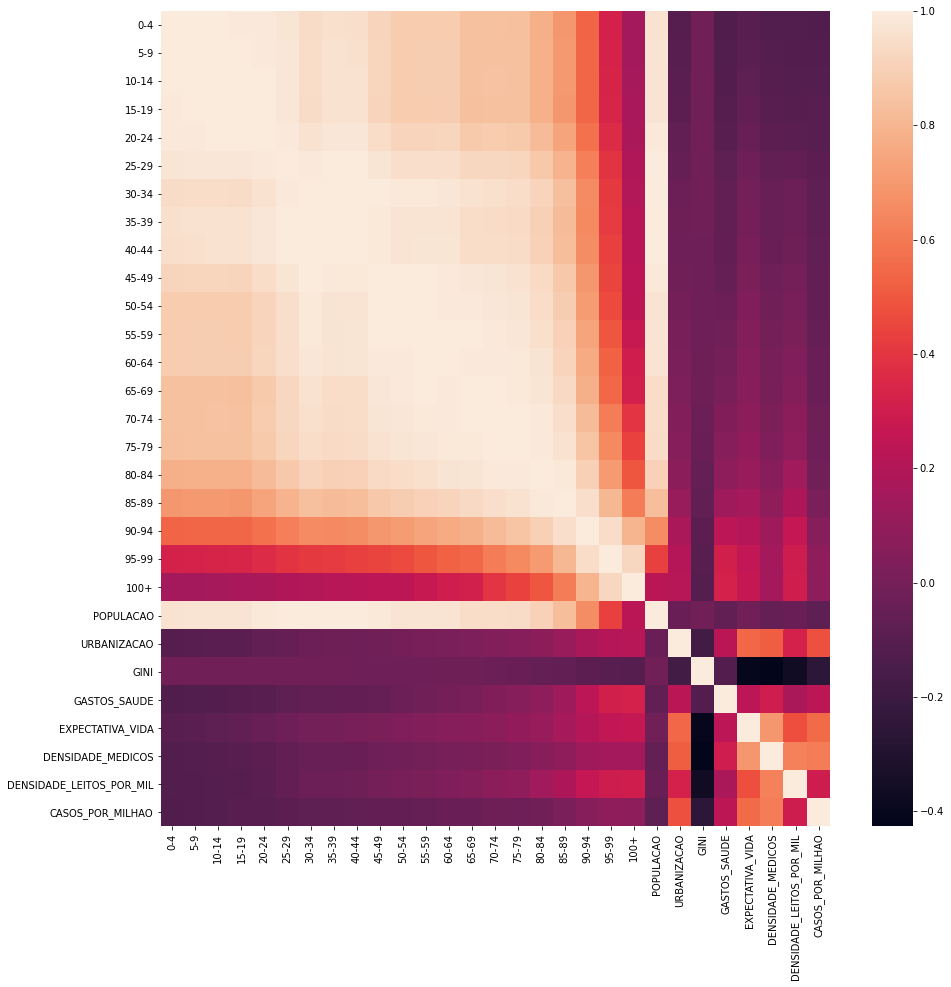

In [354]:
fig, ax0 = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(dfCorr, ax=ax0)

In [355]:
#X = dataset_explicativas
#y = df[dependente]
X = df[numericas].values[:, :-1]
y = df[dependente]

In [356]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = np.ravel(y_train)

models = [DummyRegressor(), 
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          MLPRegressor()]

for model in models :
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test), np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    



-0.00010141380666128796 39976.43471568262
0.3327486752047557 32653.276125702825
0.37507289112051145 31600.701292500027
0.22419632758974195 35209.34565499753
0.34506400466246534 32350.535090847436
-198.282613049205 564308.6963540728
